In [1]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Conv1D, GlobalMaxPooling1D, Embedding, MaxPooling1D
from tensorflow.keras.models import Model

In [2]:
#Loading the data : 
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2022-10-25 00:17:57--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.34MB/s    in 0.4s    

2022-10-25 00:17:58 (1.34 MB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
!ls

sample_data  spam.csv


In [4]:
df=pd.read_csv("spam.csv", encoding="ISO-8859-1")
print(df.shape)
df.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df=df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns= ["labels", "data"]

In [7]:
df["b_labels"] = df["labels"].map({"ham":0, "spam":1})
Y= df["b_labels"].values

In [8]:
#split up the data : 
df_train, df_test, y_train, y_test = train_test_split(df["data"], Y , test_size=0.33)
print("df_train : ", df_train.shape)
print("df_test : ", df_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

df_train :  (3733,)
df_test :  (1839,)
y_train :  (3733,)
y_test :  (1839,)


In [9]:
df_train

5166    Y she dun believe leh? I tot i told her it's t...
3854    Free msg: Single? Find a partner in your area!...
3048    Lol they don't know about my awesome phone. I ...
4276             I'm glad. You are following your dreams.
551     Hurry up, I've been weed-deficient for like th...
                              ...                        
2484    Only if you promise your getting out as SOON a...
2020    Anything lor but toa payoh got place 2 walk me...
798                       Ok i msg u b4 i leave my house.
4862    Bored housewives! Chat n date now! 0871750.77....
2860    I am not at all happy with what you saying or ...
Name: data, Length: 3733, dtype: object

In [10]:
#Convert sentences to sequences : 
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words= MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)


In [ ]:
# get word -> integer mapping 
word2idx = tokenizer.word_index
v = len(word2idx)
print("Found {} unique tokens".format(v))

Found 7212 unique tokens


In [ ]:
#Pad sequences so that we can get N x T matrix 
data_train= pad_sequences(sequences_train)
print("Shape of data train tensor : ", data_train.shape)

#get sequence length : 
T= data_train.shape[1]

data_test= pad_sequences(sequences_test, maxlen=T)
print("Shape data_test : ", data_test.shape)

Shape of data train tensor :  (3733, 189)
Shape data_test :  (1839, 189)


In [ ]:
#Creating the model : 
#We get to choose embedding dimensionality : 

D=20 

#Note : we actually want the size of the embedding matrix to (V + 1) x D 
#because the first index starts from 1 and not 0. 
#Thus, if the final index of the embedding matrix is V, 
#then it actuallly must have size V+1 

i = Input(shape=(T,))
x = Embedding(v+1 , D)(i)
x = Conv1D(32,3, activation="relu")(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation="relu")(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation="relu")(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation="sigmoid")(x)

model = Model(i,x)

In [ ]:
model.compile(optimizer= "adam", loss= "binary_crossentropy", metrics= ["accuracy"])

history = model.fit(data_train, y_train , validation_data=(data_test,y_test), epochs=5 )

Epoch 1/5
117/117 [==============================] - 8s 51ms/step - loss: 0.3932 - accuracy: 0.8636 - val_loss: 0.2742 - val_accuracy: 0.8706
Epoch 2/5
117/117 [==============================] - 6s 47ms/step - loss: 0.1565 - accuracy: 0.9322 - val_loss: 0.1003 - val_accuracy: 0.9652
Epoch 3/5
117/117 [==============================] - 5s 41ms/step - loss: 0.0310 - accuracy: 0.9917 - val_loss: 0.0823 - val_accuracy: 0.9821
Epoch 4/5
117/117 [==============================] - 3s 25ms/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.0756 - val_accuracy: 0.9837
Epoch 5/5
117/117 [==============================] - 3s 25ms/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 0.0793 - val_accuracy: 0.9842


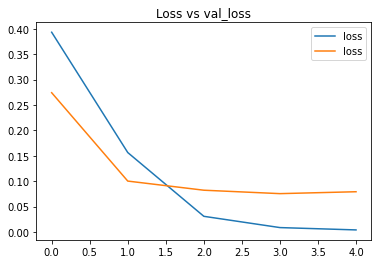

In [ ]:
plt.plot(history.history["loss"], label ="loss")
plt.plot(history.history["val_loss"],label="loss")
plt.title("Loss vs val_loss")
plt.legend()
plt.show()

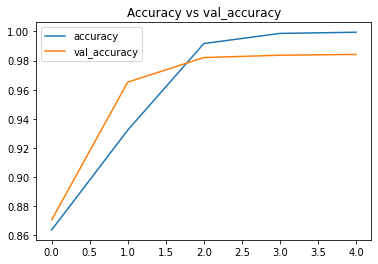

In [ ]:
#Plotting the accuracy per iteration : 
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy vs val_accuracy")
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 189)]             0         
                                                                 
 embedding (Embedding)       (None, 189, 20)           144260    
                                                                 
 conv1d (Conv1D)             (None, 187, 32)           1952      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 62, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 20, 64)           0         
 1D)                                                         